# Introduction to data structures in xarray

Now that you have learned a bit of basics about raster data and how to create a simple 2-dimensional raster array using `numpy`, we continue to explore in a more comprehensive manner how to work with real-world raster data using `xarray` and `rioxarray` libraries (+ other relevant libraries linked to them). The `xarray` library is a highly useful tool for storing, representing and manipulating raster data, while `rioxarray` provides various raster processing (GIS) capabilities on top of the `xarray` data structures, such as reading and writing several different raster formats and conducting different geocomputational tasks. Under the hood, `rioxarray` uses another Python library called `rasterio` (that works with N-dimensional `numpy` arrays) but the benefit of `xarray` and `rioxarray`is that they provide easier and more intuitive way to work with raster data layers, in a bit similar manner as working with vector data using `geopandas`. 

When working with raster data, you typically have various layers that represent different geographical features of the world (e.g. elevation, temperature, precipitation etc.) and this data is possibly captured at different times of the year/day/hour, meaning that you have longitudinal observations from the same area, constituting time series data. More often than not, you need to combine information from these layers to be able to conduct meaningful analysis based on the data, such as do a weather forecast. One of the greatest benefits of `xarray` is that you can easily store, combine and analyze all these different layers via a single object, i.e. a `Dataset`, as demonstrated in Figure 7.2. 

The two fundamental data structures provided by the `xarray` library are `DataArray` and `Dataset` (Figure 7.2). Both of them build upon and extend the strengths of `numpy` and `pandas` libraries. The `DataArray` is a labeled N-dimensional array that is similar to `pandas.Series` but works with raster data (stored as `numpy` arrays). The `Dataset` then again is a multi-dimensional in-memory array database that contains multiple `DataArray` objects. In addition to the variables containing the observations of a given phenomena, you also have the `x` and `y` coordinates of the observations stored in separate layers, as well as metadata providing relevant information about your data, such as Coordinate Reference System and/or time. Thus, a `Dataset` containing raster data is very similar to `geopandas.GeoDataFrame` and actually various `xarray` operations can feel very familiar if you have learned the basics of `pandas` and `geopandas` covered in Chapters 3 and 6. 


![**Figure 7.2** Key `xarray` data structures. Image source: Xarray Community (2024), licensed under Apache 2.0.](../img/xarray-dataset-diagram.png)

**Figure 7.2** Key `xarray` data structures. Image source: [Xarray Community](https://tutorial.xarray.dev/fundamentals/01_data_structures.html) (2024), licensed under Apache 2.0.

Some of the benefits of `xarray` include:

- A more intuitive and user-friendly interface to work with multidimensional arrays (compared e.g. to `numpy`)
- The possibility to select and combine data along a dimension across all arrays in a `Dataset` simultaneously
- Compatibility with a large ecosystem of Python libraries that work with arrays / raster data
- Tight integration of functionalities from well-known Python data analysis libraries, such as `pandas`, `numpy`, `matplotlib`, and `dask`

## Reading a file

In the following, we start by investigating a simple elevation dataset using `xarray` that represents a Digital Elevation Model (DEM) of Kilimanjaro area in Tanzania. To be able to read a raster data file (such as GeoTIFF) using `xarray`, we can use the  `.open_dataset()` function. Here, we read a `.tif` file directly from a cloud storage space that we have created for this book:

In [1]:
import xarray as xr

url = "https://a3s.fi/swift/v1/AUTH_0914d8aff9684df589041a759b549fc2/PythonGIS/elevation/kilimanjaro/ASTGTMV003_S03E036_dem.tif"
data = xr.open_dataset(url)
data

<xarray.Dataset> Size: 52MB
Dimensions:      (band: 1, x: 3601, y: 3601)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 29kB 36.0 36.0 36.0 36.0 ... 37.0 37.0 37.0 37.0
  * y            (y) float64 29kB -2.0 -2.0 -2.001 -2.001 ... -2.999 -3.0 -3.0
    spatial_ref  int64 8B ...
Data variables:
    band_data    (band, y, x) float32 52MB ...

In [3]:
type(data)

xarray.core.dataset.Dataset

As we can see, now we have read the GeoTIFF file into an `xarray` data structure called `Dataset` that we stored into a variable `data`. The `Dataset` contains the actual data values for the raster cells, as well as other relevant attribute information related to the data:

- `Dimensions` attribute shows the number of cells of the given `band`, i.e. in our case there are 3061 cells both on the `x` and `y` axis
- `Coordinates` attribute contains the actual `x` and `y` coordinates of the cells, as well as the Coordinate Reference System information stored in the `spatial_ref` attribute
- 

data2 = xr.open_rasterio(url).squeeze("band", drop=True).to_dataset(name="elevation")

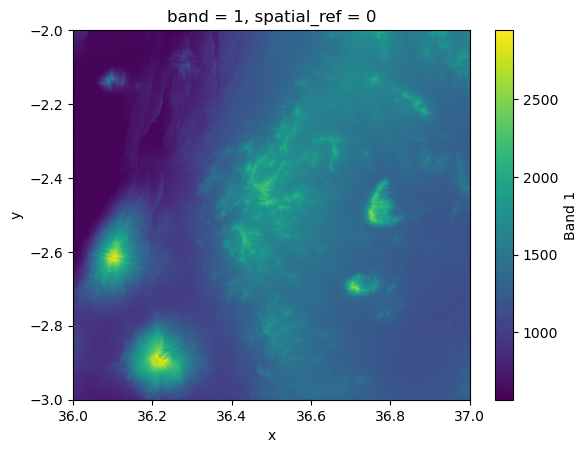

In [2]:
data["band_data"].plot()

## Dataset properties

Let's have a closer look at the properties of the file:

In [5]:
# Projection
raster.crs

CRS({'proj': 'tmerc', 'lat_0': 0, 'lon_0': -183, 'k': 0.9996, 'x_0': 500000, 'y_0': 0, 'datum': 'WGS84', 'units': 'm', 'no_defs': True})

In [6]:
# Affine transform (how raster is scaled, rotated, skewed, and/or translated)
raster.transform

Affine(28.5, 0.0, 698592.0,
       0.0, -28.5, 6697870.5)

In [7]:
# Dimensions
print(raster.width)
print(raster.height)

1288
1439


In [8]:
# Number of bands
raster.count

7

In [9]:
# Bounds of the file
raster.bounds

BoundingBox(left=698592.0, bottom=6656859.0, right=735300.0, top=6697870.5)

In [10]:
# Driver (data format)
raster.driver

'GTiff'

In [11]:
# No data values for all channels
raster.nodatavals

(None, None, None, None, None, None, None)

In [12]:
# All Metadata for the whole raster dataset
raster.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 1288,
 'height': 1439,
 'count': 7,
 'crs': CRS({'proj': 'tmerc', 'lat_0': 0, 'lon_0': -183, 'k': 0.9996, 'x_0': 500000, 'y_0': 0, 'datum': 'WGS84', 'units': 'm', 'no_defs': True}),
 'transform': Affine(28.5, 0.0, 698592.0,
        0.0, -28.5, 6697870.5)}

## Writing a file

Add material about writing to most common raster file formats.
